#Lungs Disease Classisfication
###Importing the data from Kaggle
> Git Hub : https://github.com/Souhrdya-308/Lung_Disease_Dignosis


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuel156/lungxrays-grayscale")

print("Path to dataset files:", path)

100%|██████████| 1.89G/1.89G [00:22<00:00, 88.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1


####Checking and Understanding our data

In [3]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
for dirpath, dirname, filename in os.walk(path):
  print(f"The number of directory {len(dirname)} in {dirname }has {len(filename)} images in {dirpath}")

The number of directory 1 in ['LungXRays-grayscale']has 0 images in /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1
The number of directory 3 in ['test', 'val', 'train']has 0 images in /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1/LungXRays-grayscale
The number of directory 4 in ['Tuberculosis', 'Normal', 'Pneumonia', 'Corona Virus Disease']has 0 images in /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1/LungXRays-grayscale/test
The number of directory 0 in []has 407 images in /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1/LungXRays-grayscale/test/Tuberculosis
The number of directory 0 in []has 404 images in /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1/LungXRays-grayscale/test/Normal
The number of directory 0 in []has 407 images in /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1/LungXRays-grayscale/test/Pneumonia
The number of direct

In [5]:
data_dir = os.path.join(path,"LungXRays-grayscale")
train_data_dir = os.path.join(data_dir,"train")
test_data_dir = os.path.join(data_dir,"test")
val_data_dir = os.path.join(data_dir,"val")

##Getting all the class names

In [6]:
class_names = os.listdir(train_data_dir)
class_names

['Pneumonia', 'Tuberculosis', 'Corona Virus Disease', 'Normal']

###Going to remove 'Corona Virus Disease' because there are no active cases anymore

In [7]:
import shutil

dir_to_delete = os.path.join(train_data_dir, "Corona Virus Disease")
shutil.rmtree(dir_to_delete)
print(f"Removed directory: {dir_to_delete}")

Removed directory: /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1/LungXRays-grayscale/train/Corona Virus Disease


In [8]:
class_name = os.listdir(train_data_dir)
class_name

['Pneumonia', 'Tuberculosis', 'Normal']

In [9]:
dir_to_delete = os.path.join(test_data_dir, "Corona Virus Disease")
shutil.rmtree(dir_to_delete)
print(f"Removed directory: {dir_to_delete}")
dir_to_delete = os.path.join(val_data_dir, "Corona Virus Disease")
shutil.rmtree(dir_to_delete)
print(f"Removed directory: {dir_to_delete}")

Removed directory: /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1/LungXRays-grayscale/test/Corona Virus Disease
Removed directory: /root/.cache/kagglehub/datasets/samuel156/lungxrays-grayscale/versions/1/LungXRays-grayscale/val/Corona Virus Disease


### Rechecking our class

In [10]:
class_names = os.listdir(test_data_dir)
class_names

['Pneumonia', 'Tuberculosis', 'Normal']

###We have successfully removed Corona Virus Disease
###Lets visualize some of the images

In [ ]:
import random
def sample_image(data_dir,class_name):
  target_folder = data_dir+"/"+class_name
  random_image = random.sample(os.listdir(target_folder),1)
  image_path = target_folder+"/"+random_image[0]
  img = mpimg.imread(image_path)
  plt.imshow(img)
  plt.title(f"Image label: {class_name}")
  plt.axis(False)
  plt.figure()

  print(f"Image Shape",img.shape)

###Sample Images for Tuberculosis

Image Shape (1121, 1398)


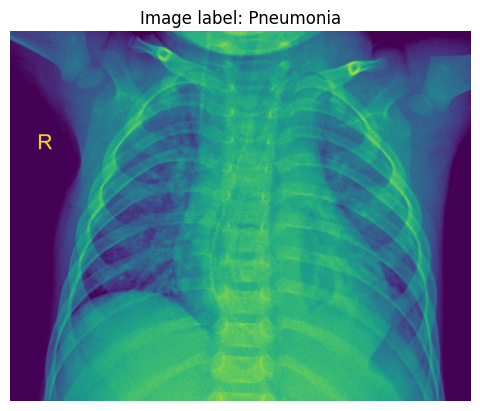

<Figure size 640x480 with 0 Axes>

In [ ]:
sample_image(train_data_dir,class_names[0])

###Sample Images for Normal Lungs

Image Shape (1410, 1624)


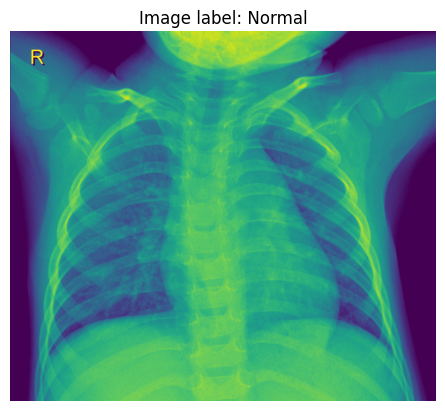

<Figure size 640x480 with 0 Axes>

In [ ]:
sample_image(train_data_dir,class_names[1])

### Images for Pneumonia

Image Shape (968, 1136)


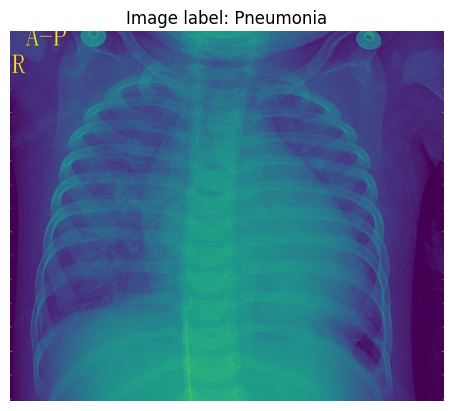

<Figure size 640x480 with 0 Axes>

In [ ]:
sample_image(train_data_dir,class_names[2])

###We have the Data_Dir for all the images
> Now we have to rescale the images 1/255.<br>
>We also have to reshape all the Images before training our model.<br>
> We can Agument the data to reduce the chance of overfitting.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   rotation_range = 0.2,
                                   zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

###We have ReScaled our Images and also Agumeneted our Training Image Dataset
>We must Re shape the images now. eg((512,512) or (224,224))<br>
>Futher we will divided the images into batches

In [13]:
train_data = train_datagen.flow_from_directory(train_data_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")
test_data = test_datagen.flow_from_directory(test_data_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")
val_data = val_datagen.flow_from_directory(val_data_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 3643 images belonging to 3 classes.
Found 1218 images belonging to 3 classes.
Found 1214 images belonging to 3 classes.


In [ ]:
images, labels = next(train_data)
print(labels)
print(labels[0].ndim)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
1


###We can see that our data is one hot encoded<br>


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

### Creating Checkpoint to store are best performing model Epoch
> We can store the best performance and save it to use it later.<br>
>It will save the model with the best validation accuracy.

In [ ]:
checkpoint = ModelCheckpoint(
    filepath  = "model_1.keras",
    save_best_only = True,
    mode = "max",
    monitor ="val_accuracy",
    verbose = 1
)

##Building Our First CNN Classification Model

In [ ]:
model_1 = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(filters = 16,
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (224,224,3)),
   tf.keras.layers.MaxPool2D(pool_size = 3,
                             padding = "valid"),
   tf.keras.layers.Conv2D(filters = 32,
                          kernel_size = 3,
                          activation = "relu"),
   tf.keras.layers.MaxPool2D(pool_size = 3,
                             padding = "valid"),
   tf.keras.layers.Conv2D(filters = 16,
                          kernel_size = 3,
                          activation = "relu"),
   tf.keras.layers.MaxPool2D(pool_size = 3,
                             padding = "valid"),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(units = 128,
                         activation = "softmax"),
   tf.keras.layers.Dense(units = 3,
                         activation = "softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Compiling our Model With optimzers, loss functions

In [ ]:
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_model_1 = model_1.fit(train_data, epochs = 25, steps_per_epoch=len(train_data),
                              validation_data = val_data,validation_steps = len(test_data), callbacks = [checkpoint])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.4007 - loss: 1.0832
Epoch 1: val_accuracy improved from -inf to 0.57331, saving model to model_1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 90s 738ms/step - accuracy: 0.4014 - loss: 1.0830 - val_accuracy: 0.5733 - val_loss: 1.0013
Epoch 2/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.6685 - loss: 0.9469
Epoch 2: val_accuracy improved from 0.57331 to 0.80972, saving model to model_1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 77s 675ms/step - accuracy: 0.6690 - loss: 0.9465 - val_accuracy: 0.8097 - val_loss: 0.8205
Epoch 3/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.7803 - loss: 0.8161
Epoch 3: val_accuracy improved from 0.80972 to 0.83278, saving model to model_1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 81s 670ms/step - accuracy: 0.7803 - loss: 0.8159 - val_accuracy: 0.8328 - val_loss: 0.7319
Epoch 4/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.8241 - loss: 0.7189
Epoch 4: val_accuracy improved from 0.83278 to 0.86656, saving model to model_1.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 76s 670ms/step - accuracy: 0.8241 - loss: 0.7188 - val_accuracy: 0.8666 - val_loss: 0.6368
Epoch 5/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.8294 - loss: 0.6632
Epoch 5: val_accuracy did not improve fro

## We have Successfully trained our model
>Our model has an accuracy of 94% ~(93.9 %)<br>
>Now lets evaluate out best model on our Validation data.

In [16]:
best_model = tf.keras.models.load_model("model_1.keras")
best_model.evaluate(val_data)

ValueError: File not found: filepath=model_1.keras. Please ensure the file is an accessible `.keras` zip file.

## We have got about 93.3% Accuracy on our Validation Data.
> Lets save our model in google Drive So that we can use it infuture without training or DataAgumentation.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp model_1.keras /content/drive/MyDrive/Lung_Model/

cp: cannot stat 'model_1.keras': No such file or directory


##Lets Extract the best model from google drive and check weather its working or not


In [19]:
model_best = tf.keras.models.load_model("/content/drive/MyDrive/Lung_Model/model_1.keras")
model_best.evaluate(test_data)

39/39 ━━━━━━━━━━━━━━━━━━━━ 35s 850ms/step - accuracy: 0.9511 - loss: 0.1974


[0.20200611650943756, 0.9507389068603516]

## Yes its working very well. As we can see here that our model is is predicting with an accuracy of 94.56% its Awesome
